<a href="https://colab.research.google.com/github/Ruby-L-i-n/CSDS234_FinalProject/blob/main/SpotifyPlaylist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import


In [ ]:
import numpy as np
import pandas as pd
import heapq
import random
import json
import matplotlib.pyplot as pyplot

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

###Reading Json File

In [ ]:
with open("/content/mpd.slice.0-999.json") as f:
    data = json.load(f)

flattened_playlists = []
for playlist in data['playlists']:
    playlist_info = {
        'pid': playlist['pid'],
        'name': playlist.get('name', None),
        'collaborative': playlist['collaborative'],
        'modified_at': playlist['modified_at'],
        'num_tracks': playlist['num_tracks'],
        'num_albums': playlist['num_albums'],
        'num_followers': playlist['num_followers']
    }

    for track in playlist['tracks']:
        track_info = {
            'playlist_pid': playlist['pid'],
            'track_pos': track['pos'],
            'track_name': track['track_name'],
            'track_uri': track['track_uri'],
            'artist_name': track['artist_name'],
            'artist_uri': track['artist_uri'],
            'album_name': track['album_name'],
            'album_uri': track['album_uri'],
            'duration_ms': track['duration_ms']
        }
        flattened_playlists.append({**playlist_info, **track_info})

# Create a Pandas DataFrame
df = pd.DataFrame(flattened_playlists)
df.head(10)

,pid,name,collaborative,modified_at,num_tracks,num_albums,num_followers,playlist_pid,track_pos,track_name,track_uri,artist_name,artist_uri,album_name,album_uri,duration_ms
0,0,Throwbacks,false,1493424000,52,47,1,0,0,Lose Control (feat. Ciara & Fat Man Scoop),spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,The Cookbook,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863
1,0,Throwbacks,false,1493424000,52,47,1,0,1,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,spotify:artist:26dSoYclwsYLMAKD3tpOr4,In The Zone,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800
2,0,Throwbacks,false,1493424000,52,47,1,0,2,Crazy In Love,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Dangerously In Love (Alben für die Ewigkeit),spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933
3,0,Throwbacks,false,1493424000,52,47,1,0,3,Rock Your Body,spotify:track:1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,Justified,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266
4,0,Throwbacks,false,1493424000,52,47,1,0,4,It Wasn't Me,spotify:track:1lzr43nnXAijIGYnCT8M8H,Shaggy,spotify:artist:5EvFsr3kj42KNv97ZEnqij,Hot Shot,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600
5,0,Throwbacks,false,1493424000,52,47,1,0,5,Yeah!,spotify:track:0XUfyU2QviPAs6bxSpXYG4,Usher,spotify:artist:23zg3TcAtWQy7J6upgbUnj,Confessions,spotify:album:0vO0b1AvY49CPQyVisJLj0,250373
6,0,Throwbacks,false,1493424000,52,47,1,0,6,My Boo,spotify:track:68vgtRHr7iZHpzGpon6Jlo,Usher,spotify:artist:23zg3TcAtWQy7J6upgbUnj,Confessions,spotify:album:1RM6MGv6bcl6NrAG8PGoZk,223440
7,0,Throwbacks,false,1493424000,52,47,1,0,7,Buttons,spotify:track:3BxWKCI06eQ5Od8TY2JBeA,The Pussycat Dolls,spotify:artist:6wPhSqRtPu1UhRCDX5yaDJ,PCD,spotify:album:5x8e8UcCeOgrOzSnDGuPye,225560
8,0,Throwbacks,false,1493424000,52,47,1,0,8,Say My Name,spotify:track:7H6ev70Weq6DdpZyyTmUXk,Destiny's Child,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,The Writing's On The Wall,spotify:album:283NWqNsCA9GwVHrJk59CG,271333
9,0,Throwbacks,false,1493424000,52,47,1,0,9,Hey Ya! - Radio Mix / Club Mix,spotify:track:2PpruBYCo4H7WOBJ7Q2EwM,OutKast,spotify:artist:1G9G7WwrXka3Z1r7aIDjI7,Speakerboxxx/The Love Below,spotify:album:1UsmQ3bpJTyK6ygoOOjG1r,235213


Before we start it is usful to gain some insights on the data we are working with.

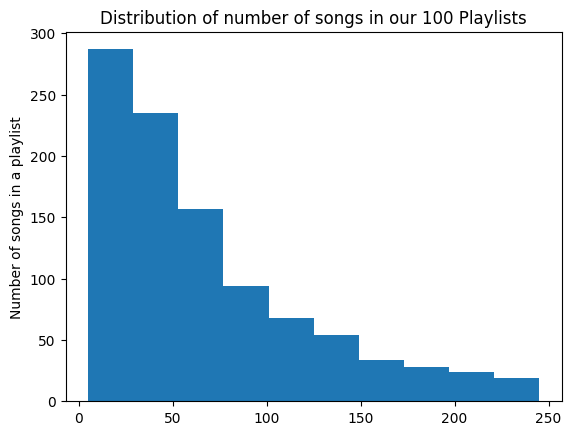

In [ ]:
pyplot.hist(df['pid'].value_counts())
pyplot.title("Distribution of number of songs in our 100 Playlists")
pyplot.ylabel("Count")
pyplot.ylabel("Number of songs in a playlist")
pyplot.show()

Text(0.5, 0, 'Total songs across playlists')

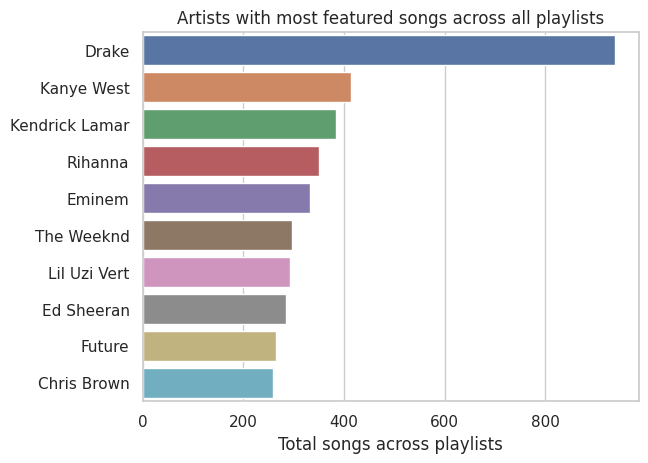

In [ ]:
# Checking which artists are featured most across all playlists
values = list(df['artist_name'].value_counts())
names = df['artist_name'].value_counts().index.tolist()

ax = sns.barplot(y=names[0:10], x=values[0:10])
ax.set_title('Artists with most featured songs across all playlists')
ax.set_xlabel('Total songs across playlists')